# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.8.2'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
World Health Organization (2020), https://covid19.who.int
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/dsfsi/covid19za
Data on the COVID-19 pandemic in Portugal (2020), https://github.com/dssg-pt/covid19pt-data
COVID-19_plus_Russia GitHub repository (2020), https://github.com/grwlf/COVID-19_plus_Russia
COVID-19 Peru Dat

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
World Health Organization (2020), https://covid19.who.int
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/dsfsi/covid19za
Data on the COVID-19 pandemic in Portugal (2020), https://github.com/dssg-pt/covid19pt-data
COVID-19_plus_Russia GitHub repository (2020), https://github.com/grwlf/COVID-19_plus_Russia
COVID-19 Peru Dat

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
218499,2020-09-08,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
218500,2020-09-09,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
218501,2020-09-10,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
218502,2020-09-11,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
218503,2020-09-12,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
218499,2020-09-08,Colombia,Vichada,14,0,0,14
218500,2020-09-09,Colombia,Vichada,14,0,0,14
218501,2020-09-10,Colombia,Vichada,14,0,0,14
218502,2020-09-11,Colombia,Vichada,14,0,0,14
218503,2020-09-12,Colombia,Vichada,14,0,0,14


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
173,2020-09-08,22019,2470,378,19171
174,2020-09-09,22168,2349,379,19440
175,2020-09-10,22444,2478,379,19587
176,2020-09-11,22631,2439,380,19812
177,2020-09-12,22631,2439,380,19812


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-09-08,27387210,8102612,895223,18389375,0.016344,0.335729,0.046422
2020-09-09,27665277,8150854,901081,18613342,0.016285,0.336403,0.046175
2020-09-10,27955379,8230364,906723,18818292,0.016217,0.336577,0.045968
2020-09-11,28256536,8320680,912123,19023733,0.016140,0.336625,0.045753
2020-09-12,28256543,8386263,912123,18958157,0.016140,0.335465,0.045904


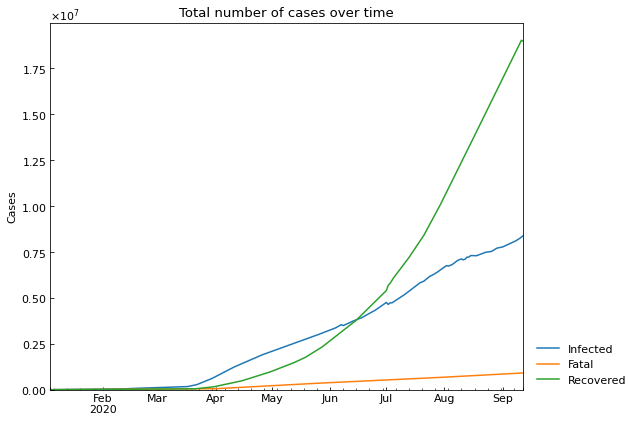

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
212,2020-09-08,72728,8067,1398,63263
213,2020-09-09,73236,7741,1412,64083
214,2020-09-10,73947,7708,1419,64820
215,2020-09-11,74591,7587,1428,65576
216,2020-09-12,74598,73170,1428,64708


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
209,2020-09-07,71856,7957,1363,62536
210,2020-09-08,72234,7575,1377,63282
211,2020-09-09,72726,7233,1393,64100
212,2020-09-10,73221,6980,1406,64835
213,2020-09-11,73901,6899,1412,65590


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
218499,2020-09-08,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
218500,2020-09-09,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
218501,2020-09-10,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
218502,2020-09-11,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
218503,2020-09-12,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
198897,COL,Colombia,Vichada,2020-09-08,107808
198898,COL,Colombia,Vichada,2020-09-09,107808
198899,COL,Colombia,Vichada,2020-09-10,107808
198900,COL,Colombia,Vichada,2020-09-11,107808
198901,COL,Colombia,Vichada,2020-09-12,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
218499,2020-09-08,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
218500,2020-09-09,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
218501,2020-09-10,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
218502,2020-09-11,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
218503,2020-09-12,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
218499,2020-09-08,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
218500,2020-09-09,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
218501,2020-09-10,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
218502,2020-09-11,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
218503,2020-09-12,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
248,2020-09-08,1,1,1,0,0,1,1,3,2,2,1,30.56
249,2020-09-09,1,1,1,0,0,1,1,3,2,2,1,30.56
250,2020-09-10,1,1,1,0,0,1,1,3,2,2,1,30.56
251,2020-09-11,1,1,1,0,0,1,1,3,2,2,1,30.56
252,2020-09-12,1,1,1,0,0,1,1,3,2,2,1,30.56


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
248,2020-09-08,1,1,1,0,0,1,1,3,2,2,1,30.56
249,2020-09-09,1,1,1,0,0,1,1,3,2,2,1,30.56
250,2020-09-10,1,1,1,0,0,1,1,3,2,2,1,30.56
251,2020-09-11,1,1,1,0,0,1,1,3,2,2,1,30.56
252,2020-09-12,1,1,1,0,0,1,1,3,2,2,1,30.56


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

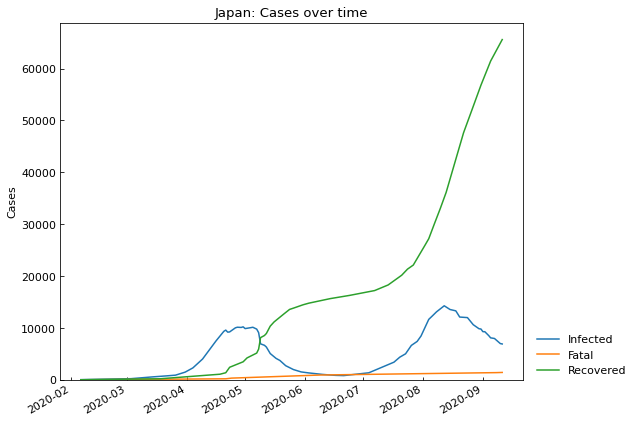

,Date,Confirmed,Infected,Fatal,Recovered
209,2020-09-07,71856,7957,1363,62536
210,2020-09-08,72234,7575,1377,63282
211,2020-09-09,72726,7233,1393,64100
212,2020-09-10,73221,6980,1406,64835
213,2020-09-11,73901,6899,1412,65590


In [26]:
import matplotlib
warnings.simplefilter("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

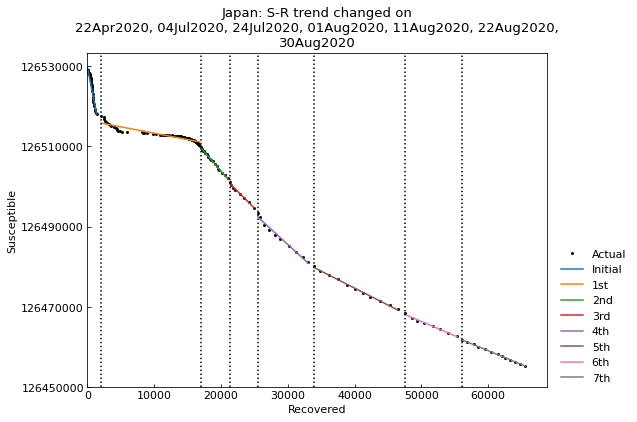

,Type,Start,End,Population
0th,Past,06Feb2020,21Apr2020,126529100
1st,Past,22Apr2020,03Jul2020,126529100
2nd,Past,04Jul2020,23Jul2020,126529100
3rd,Past,24Jul2020,31Jul2020,126529100
4th,Past,01Aug2020,10Aug2020,126529100
5th,Past,11Aug2020,21Aug2020,126529100
6th,Past,22Aug2020,29Aug2020,126529100
7th,Past,30Aug2020,11Sep2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	7th phase (30Aug2020 - 11Sep2020): finished  545 trials in 0 min 15 sec

	3rd phase (24Jul2020 - 31Jul2020): finished  692 trials in 0 min 15 sec

	2nd phase (04Jul2020 - 23Jul2020): finished 2001 trials in 1 min  0 sec

	1st phase (22Apr2020 - 03Jul2020): finished 1960 trials in 1 min  0 sec

	0th phase (06Feb2020 - 21Apr2020): finished 1971 trials in 1 min  0 sec

	6th phase (22Aug2020 - 29Aug2020): finished  263 trials in 0 min  5 sec

	4th phase (01Aug2020 - 10Aug2020): finished 2021 trials in 1 min  0 sec

	5th phase (11Aug2020 - 21Aug2020): finished 2166 trials in 1 min  0 sec

Completed optimization. Total: 2 min 16 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/beta [day],1/alpha2 [day],1/gamma [day],alpha1 [-],RMSLE,Trials,Runtime
0th,Past,06Feb2020,21Apr2020,126529100,SIR-F,5.20,0.018968,0.000063,0.051253,0.009609,720,9,7886,52,0.019,0.944454,1971,1 min 0 sec
1st,Past,22Apr2020,03Jul2020,126529100,SIR-F,0.38,0.098209,0.000290,0.014142,0.033333,720,35,1722,15,0.098,0.796711,1960,1 min 0 sec
2nd,Past,04Jul2020,23Jul2020,126529100,SIR-F,2.04,0.000011,0.000099,0.071341,0.034859,720,7,5054,14,0.000,0.041788,2001,1 min 0 sec
3rd,Past,24Jul2020,31Jul2020,126529100,SIR-F,1.83,0.000158,0.000060,0.065019,0.035559,720,7,8379,14,0.000,0.017219,692,0 min 15 sec
4th,Past,01Aug2020,10Aug2020,126529100,SIR-F,1.80,0.000475,0.000139,0.054968,0.030362,720,9,3594,16,0.000,0.034973,2021,1 min 0 sec
5th,Past,11Aug2020,21Aug2020,126529100,SIR-F,0.87,0.000629,0.000316,0.040666,0.046221,720,12,1583,10,0.001,0.020607,2166,1 min 0 sec
6th,Past,22Aug2020,29Aug2020,126529100,SIR-F,0.62,0.000488,0.000526,0.033715,0.054236,720,14,950,9,0.000,0.051443,263,0 min 5 sec
7th,Past,30Aug2020,11Sep2020,126529100,SIR-F,0.69,0.000152,0.000791,0.033849,0.048169,720,14,632,10,0.000,0.013043,545,0 min 15 sec


### Accuracy of estimation

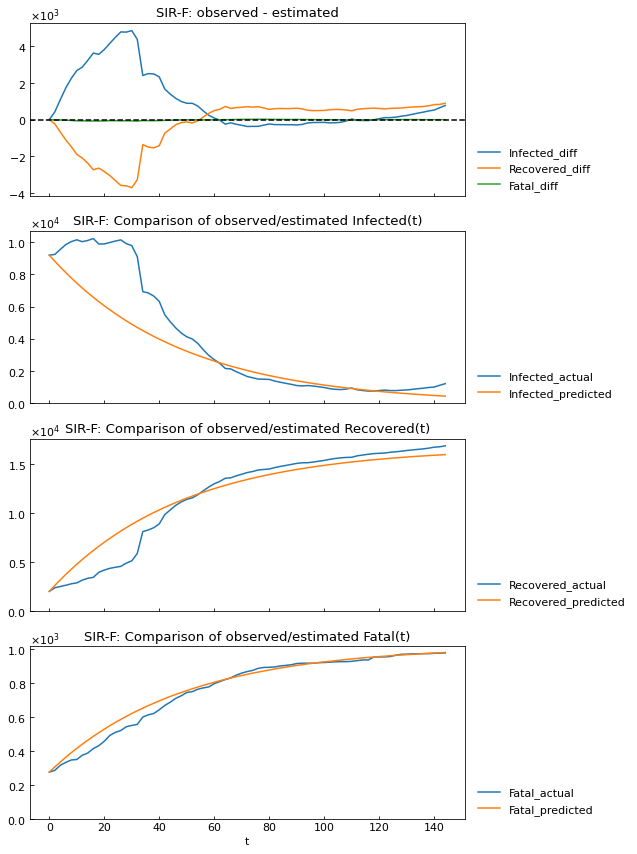

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.8

### Show parameter history

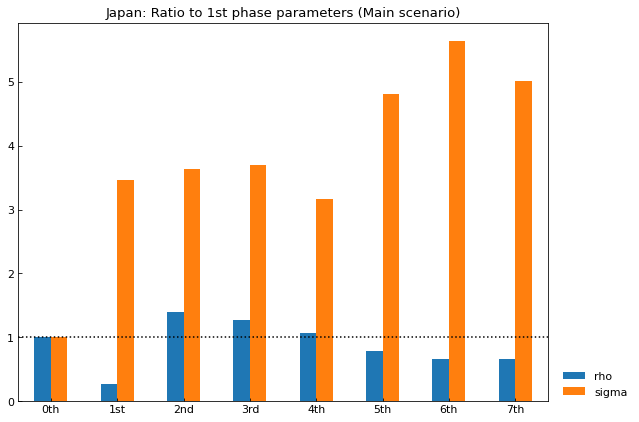

,0th,1st,2nd,3rd,4th,5th,6th,7th
rho,1.0,0.275924,1.391946,1.268587,1.072479,0.793441,0.657822,0.660424
sigma,1.0,3.469076,3.627926,3.700708,3.159832,4.810415,5.644534,5.013116


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

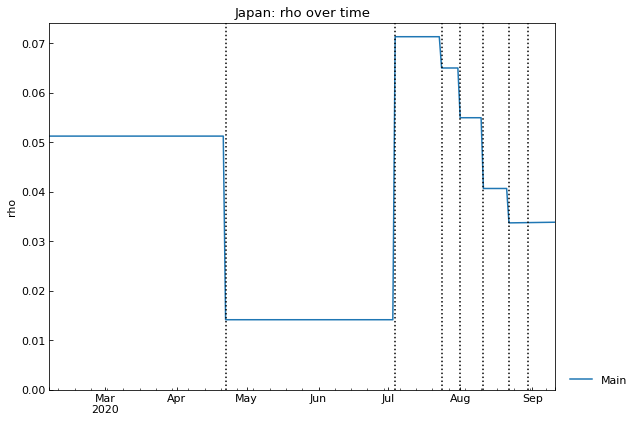

In [33]:
# version >= 2.8.0
_ = scenario.history(target="rho")

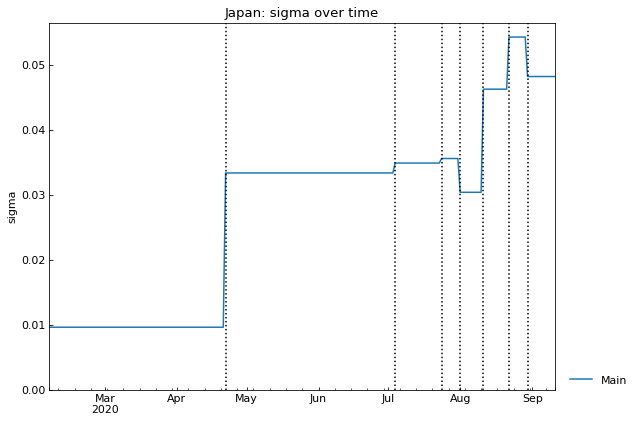

In [34]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

### Show the history of reproduction number

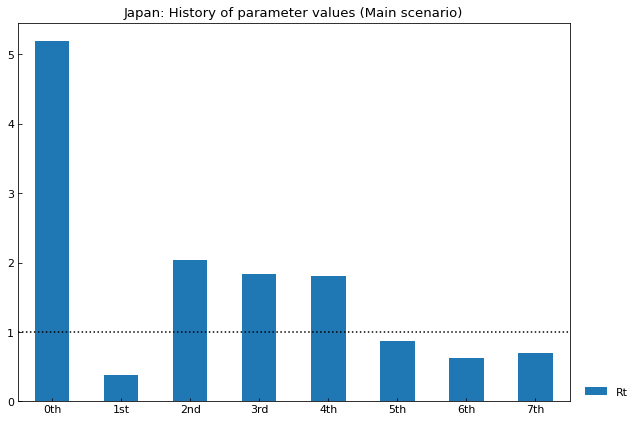

,0th,1st,2nd,3rd,4th,5th,6th,7th
Rt,5.2,0.38,2.04,1.83,1.8,0.87,0.62,0.69


In [35]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

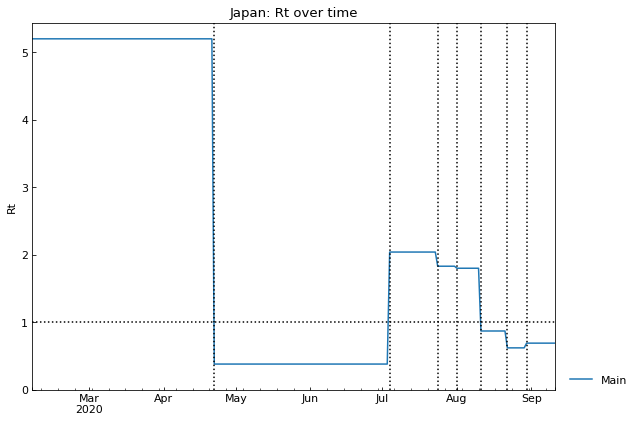

In [36]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

### Simulate the number of cases

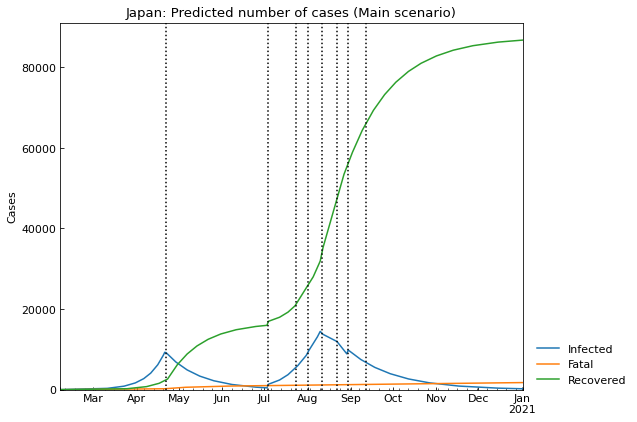

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,88680,1768,253,86659
328,2020-12-30,88696,1768,245,86683
329,2020-12-31,88712,1768,238,86706
330,2021-01-01,88728,1769,231,86728
331,2021-01-02,88743,1769,224,86750


In [37]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [38]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.04816900772359793

In [39]:
sigma_new = sigma_current * 2
sigma_new

0.09633801544719586

In [40]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  5.20   
         1st      Past  22Apr2020  03Jul2020   126529100  SIR-F  0.38   
         2nd      Past  04Jul2020  23Jul2020   126529100  SIR-F  2.04   
         3rd      Past  24Jul2020  31Jul2020   126529100  SIR-F  1.83   
         4th      Past  01Aug2020  10Aug2020   126529100  SIR-F  1.80   
         5th      Past  11Aug2020  21Aug2020   126529100  SIR-F  0.87   
         6th      Past  22Aug2020  29Aug2020   126529100  SIR-F  0.62   
         7th      Past  30Aug2020  11Sep2020   126529100  SIR-F  0.69   
         8th    Future  12Sep2020  01Jan2021   126529100  SIR-F  0.69   
Medicine 0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  5.20   
         1st      Past  22Apr2020  03Jul2020   126529100  SIR-F  0.38   
         2nd      Past  04Jul2020  23Jul2020   126529100  SIR-F  2.04   
         3rd      Past  24Jul2020  31Jul2020   126529100  SIR-F  1.83   
         4th      Past  01Aug2020  10Aug2020   126529100  SIR-F  1.80   
         5th      Past  11Aug2020  21Aug2020   126529100  SIR-F  0.87   
         6th      Past  22Aug2020  29Aug2020   126529100  SIR-F  0.62   
         7th      Past  30Aug2020  11Sep2020   126529100  SIR-F  0.69   
         8th    Future  12Sep2020  12Oct2020   126529100  SIR-F  0.69   
         9th    Future  13Oct2020  01Jan2021   126529100  SIR-F  0.35   

                   theta     kappa       rho     sigma  tau  1/beta [day]  \
Scenario Phase                                                              
Main     0th    0.018968  0.000063  0.051253  0.009609  720             9   
         1st    0.098209  0.000290  0.014142  0.033333  720            35   
         2nd    0.000011  0.000099  0.071341  0.034859  720             7   
         3rd    0.000158  0.000060  0.065019  0.035559  720             7   
         4th    0.000475  0.000139  0.054968  0.030362  720             9   
         5th    0.000629  0.000316  0.040666  0.046221  720            12   
         6th    0.000488  0.000526  0.033715  0.054236  720            14   
         7th    0.000152  0.000791  0.033849  0.048169  720            14   
         8th    0.000152  0.000791  0.033849  0.048169  720            14   
Medicine 0th    0.018968  0.000063  0.051253  0.009609  720             9   
         1st    0.098209  0.000290  0.014142  0.033333  720            35   
         2nd    0.000011  0.000099  0.071341  0.034859  720             7   
         3rd    0.000158  0.000060  0.065019  0.035559  720             7   
         4th    0.000475  0.000139  0.054968  0.030362  720             9   
         5th    0.000629  0.000316  0.040666  0.046221  720            12   
         6th    0.000488  0.000526  0.033715  0.054236  720            14   
         7th    0.000152  0.000791  0.033849  0.048169  720            14   
         8th    0.000152  0.000791  0.033849  0.048169  720            14   
         9th    0.000152  0.000791  0.033849  0.096338  720            14   

                1/alpha2 [day]  1/gamma [day]  alpha1 [-]      RMSLE Trials  \
Scenario Phase                                                                
Main     0th              7886             52       0.019   0.944454   1971   
         1st              1722             15       0.098   0.796711   1960   
         2nd              5054             14       0.000  0.0417878   2001   
         3rd              8379             14       0.000  0.0172193    692   
         4th              3594             16       0.000  0.0349727   2021   
         5th              1583             10       0.001  0.0206072   2166   
         6th               950              9       0.000  0.0514432    263   
         7th               632             10       0.000  0.0130433    545   
         8th               632             10       0.000          -      - 

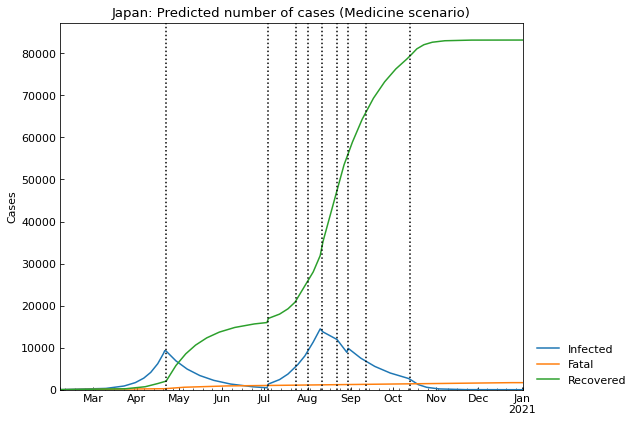

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,84831,1677,0,83154
328,2020-12-30,84831,1677,0,83154
329,2020-12-31,84831,1677,0,83154
330,2021-01-01,84831,1677,0,83154
331,2021-01-02,84831,1677,0,83154


In [41]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [42]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,9th_Rt
Main,14464,10Aug2020,224,1769,-
Medicine,14464,10Aug2020,0,1677,0.35


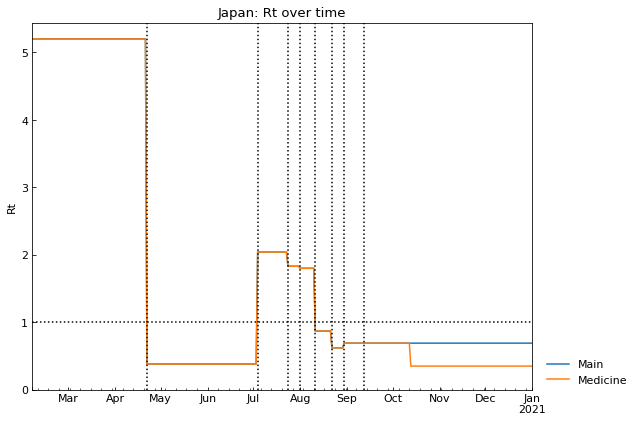

In [43]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

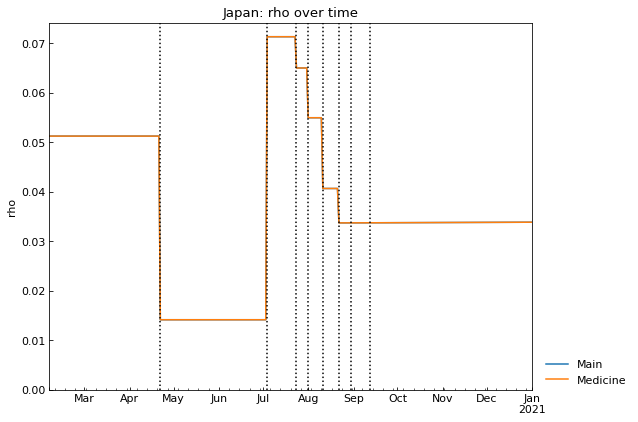

In [44]:
# version >= 2.8.0
_ = scenario.history(target="rho")

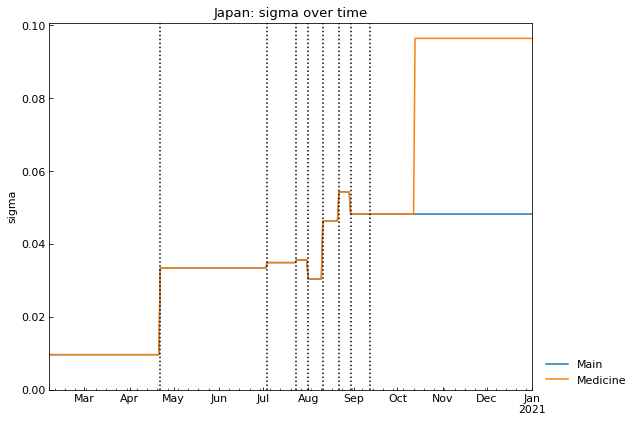

In [45]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

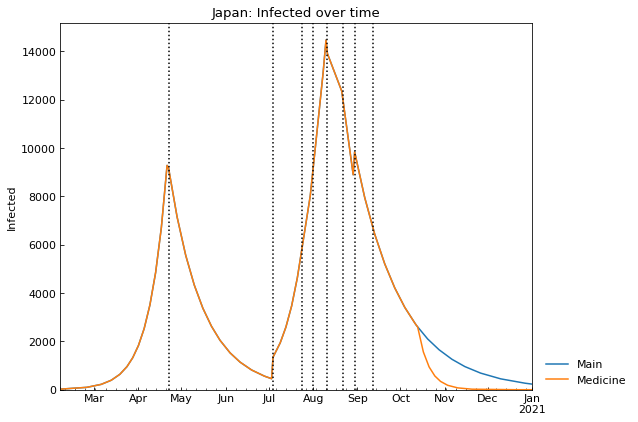

In [46]:
# version >= 2.8.0
_ = scenario.history(target="Infected")